In [1]:
import pandas as pd
import networkx as nx

In [2]:
from itertools import combinations
def generate_tuple_ind_links(row):
    return pd.DataFrame(list(combinations(row, 2)), columns=['ind_1', 'ind_2'])

In [3]:
sales_df = pd.read_csv("../captive/sales.csv").drop_duplicates()
links_df = pd.read_csv("../captive/links.csv")

In [5]:
sales_df.nunique()

PRODUCT_ID         6
IND_ID        412126
DATE             202
dtype: int64

In [7]:
sales_df.nunique()

PRODUCT_ID         6
IND_ID        412126
DATE             202
dtype: int64

In [8]:
links_df = links_df.applymap(lambda str: str.split('-'))

In [9]:
links_df["item_size"] = links_df[["LINKS"]].applymap(lambda l: len(l))

In [10]:
links_df = links_df[links_df["item_size"]>1][["LINKS"]]

In [11]:
df_duple_links = pd.concat(links_df['LINKS'].apply(generate_tuple_ind_links).tolist(), ignore_index=True)

In [12]:
df_duple_links["ind_1"] = df_duple_links["ind_1"].astype(int, errors='raise')
df_duple_links["ind_2"] = df_duple_links["ind_2"].astype(int, errors='raise')

In [13]:
display(sales_df.dtypes)
display(df_duple_links.dtypes)

PRODUCT_ID    int64
IND_ID        int64
DATE          int64
dtype: object

ind_1    int64
ind_2    int64
dtype: object

In [14]:
merged_df = pd.concat([
    sales_df[sales_df['IND_ID'].isin(df_duple_links['ind_1'])],
    sales_df[sales_df['IND_ID'].isin(df_duple_links['ind_2'])]
], ignore_index=True)

# Drop duplicates if needed
merged_df = merged_df.drop_duplicates()

# Reset index if necessary
merged_df = merged_df.reset_index(drop=True)

In [15]:
G = nx.from_pandas_edgelist(df_duple_links, 'ind_1', 'ind_2', create_using=nx.Graph())

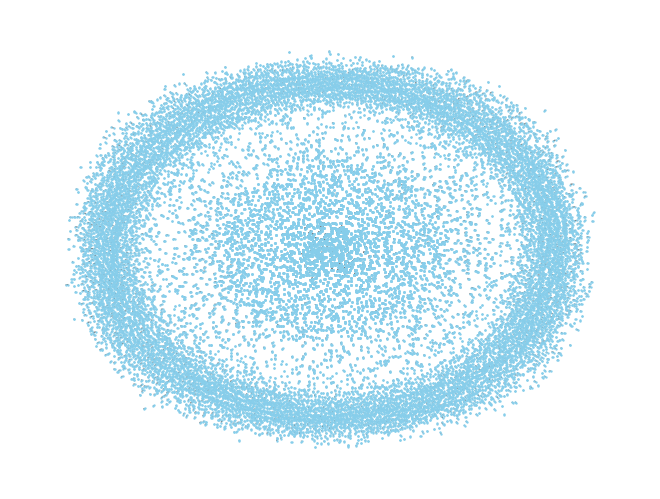

In [16]:
import matplotlib.pyplot as plt
import random

#nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()



# Find connected components
connected_components = list(nx.connected_components(G))

# Filter nodes that are part of at least one connected component
nodes_to_draw = [node for component in connected_components for node in component]

# Create a subgraph with the connected nodes
subgraph = G.subgraph(nodes_to_draw)

# Customize node size and other attributes
node_size = .5  # You can adjust the size of the nodes
node_color = 'skyblue'
edge_color = 'gray'

# Draw the subgraph with customized attributes
nx.draw(subgraph, with_labels=False, font_weight='bold', node_size=node_size, node_color=node_color, edge_color=edge_color)

plt.show()

In [86]:
sales_df

,PRODUCT_ID,IND_ID,DATE
0,1,335466125,9
1,2,3011781025,9
2,1,1268741911,9
3,1,1598984,9
4,1,3342136296,9
...,...,...,...
724868,2,1399288591,203
724869,2,1399288591,203
724870,62,1383320685,204
724871,62,1383320685,204


In [121]:
T= 7

In [181]:
i = 0
preserved_0 = 0
preserved_1 = 0
preserved_2 = 0
preserved_3 = 0
preserved_4 = 0
for edge in G.edges:
    if i <= 100000:
#        print(f"I1= {edge[0]} --> I2={edge[1]}")
        indiv1_sales = sales_df[sales_df["IND_ID"]==edge[0]]
#        display(indiv1_sales)
        same_sales = 0
        for (index,prd,date) in indiv1_sales[["PRODUCT_ID","DATE"]].itertuples():
#            print(f"{index} --> PRODUCT: {prd}, DATE: {date}")
            indiv2_sales_prd = sales_df[(sales_df["IND_ID"]==edge[1])&(sales_df["PRODUCT_ID"]==prd)&((sales_df["DATE"]>date-7) & (sales_df["DATE"]<date+7))]
#            display(indiv2_sales_prd)
#            print(len(indiv2_sales_prd))
            same_sales = same_sales+len(indiv2_sales_prd)
        if same_sales > 0:
            preserved_0 = preserved_0 + 1
        if same_sales > 1:
            preserved_1 = preserved_1 + 1
        if same_sales > 2:
            preserved_2 = preserved_2 + 1
        if same_sales > 3:
            preserved_3 = preserved_3 + 1
        if same_sales > 4:
            preserved_4 = preserved_4 + 1
#        print("********************************")
    else:
        break
    
    i = i + 1
    

print("- At least 1 -->",i, "connections drops to", preserved_0,"ratio:", preserved_0/i)
print("- At least 2 -->",i, "connections drops to", preserved_1,"ratio:", preserved_1/i)
print("- At least 3 -->",i, "connections drops to", preserved_2,"ratio:", preserved_2/i)
print("- At least 4 -->",i, "connections drops to", preserved_3,"ratio:", preserved_3/i)
print("- At least 5 -->",i, "connections drops to", preserved_4,"ratio:", preserved_4/i)

- At least 1 --> 57451 connections drops to 8557 ratio: 0.14894431776644446
- At least 2 --> 57451 connections drops to 305 ratio: 0.005308871908234844
- At least 3 --> 57451 connections drops to 26 ratio: 0.00045255957250526536
- At least 4 --> 57451 connections drops to 9 ratio: 0.00015665523663643802
- At least 5 --> 57451 connections drops to 2 ratio: 3.481227480809734e-05


- At least 1 --> 57451 connections drops to 8557 ratio: 0.14894431776644446
- At least 2 --> 57451 connections drops to 305 ratio: 0.005308871908234844
- At least 3 --> 57451 connections drops to 26 ratio: 0.00045255957250526536
- At least 4 --> 57451 connections drops to 9 ratio: 0.00015665523663643802
- At least 5 --> 57451 connections drops to 2 ratio: 3.481227480809734e-05

In [153]:
date

152

In [155]:
sales_df[(sales_df["IND_ID"]==edge[1])&(sales_df["PRODUCT_ID"]==prd)&((sales_df["DATE"]>date-17) & (sales_df["DATE"]<date+17))]

,PRODUCT_ID,IND_ID,DATE
563275,2,1699348961,167


In [ ]:
4177706657 64267885
501469-PRODUCT: 2, DATE: 151
PRODUCT_ID	IND_ID	DATE
PRODUCT_ID	IND_ID	DATE
501469	2	4177706657	151
0